In [78]:
#Modules for EDA
import pandas as np
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

#ML modules for K means
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
df = pd.read_csv('iris.data')
df.shape

(150, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
type            150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Working on sepal-length and sepal-width features**

In [5]:
sepal_df = df[['sepal-length','sepal-width','type']]
sepal_df.head()

,sepal-length,sepal-width,type
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


# **Visualizing Sepal-length and sepal-width**

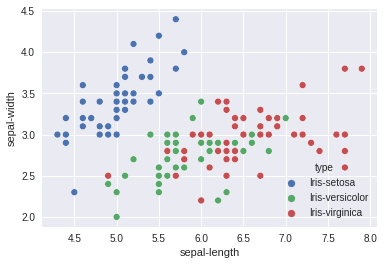

In [6]:
sns.scatterplot(data=sepal_df,x='sepal-length',y='sepal-width',hue='type')
plt.show()

In [7]:
sepal_df.describe()

,sepal-length,sepal-width
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


# **Splitting and Training**

In [42]:
x = sepal_df[['sepal-length','sepal-width']]

x_train,x_test = train_test_split(x,test_size=0.33)
#We dont have y_train and y_test because this is unsupervised algorithm

In [43]:
x_train.shape ,x_test.shape

((100, 2), (50, 2))

# **Visualize Train data**

In [44]:
clusters = KMeans(n_clusters=3)
train_cls = clusters.fit_predict(x_train)

In [48]:
x_train['cluster_train'] = train_cls

In [49]:
x_train.head()

,sepal-length,sepal-width,cluster_train
58,0.638889,0.375000,2
148,0.527778,0.583333,2
93,0.194444,0.125000,1
79,0.388889,0.250000,1
7,0.194444,0.583333,0


# **We have 3 Clusters 0,1 and 2**

In [50]:
s0 = x_train[x_train['cluster_train'] == 0]
s1 = x_train[x_train['cluster_train'] == 1]
s2 = x_train[x_train['cluster_train'] == 2]

# **Centroids of each cluster**

In [53]:
centers = clusters.cluster_centers_

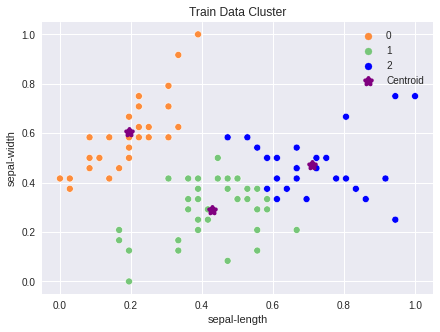

In [57]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=s0,x='sepal-length',y='sepal-width',palette='Oranges',hue='cluster_train')
sns.scatterplot(data=s1,x='sepal-length',y='sepal-width',palette='YlGn',hue='cluster_train')
sns.scatterplot(data=s2,x='sepal-length',y='sepal-width',palette='winter',hue='cluster_train')

plt.scatter(centers[:,0],centers[:,1],marker='*',linewidth=4,color='purple',label='Centroid')
plt.title('Train Data Cluster')
plt.legend()
plt.show()

# **Predictions on test data**

In [58]:
cluster_test = clusters.predict(x_test)

In [60]:
x_test['cluster_test'] = cluster_test

In [62]:
st0 = x_test[x_test['cluster_test'] == 0]
st1 = x_test[x_test['cluster_test'] == 1]
st2 = x_test[x_test['cluster_test'] == 2]

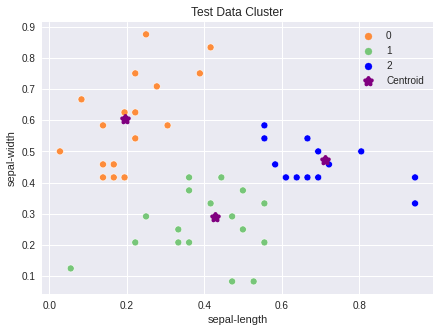

In [64]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=st0,x='sepal-length',y='sepal-width',palette='Oranges',hue='cluster_test')
sns.scatterplot(data=st1,x='sepal-length',y='sepal-width',palette='YlGn',hue='cluster_test')
sns.scatterplot(data=st2,x='sepal-length',y='sepal-width',palette='winter',hue='cluster_test')

plt.scatter(centers[:,0],centers[:,1],marker='*',linewidth=4,color='purple',label='Centroid')
plt.title('Test Data Cluster')
plt.legend()
plt.show()

### **Now your task is to work on other features of iris data. Good luck :)**